# Task 1

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


In [56]:
# initial parameters

D = 5
beta = 10
dt = 0.01

c_hi = 1    # state Mr Hi
c_off = 0   # state Officer
c_other = 0.5   # state other

w_init = 0.5    # initial weight

# club initialization
g = nx.karate_club_graph()

# add state attribute to nodes
for i, j in g.nodes(data = True):
    # print(i)
    g.add_node(i, state=0)

# add weight attribute to edges

# for i, j in g.edges(data = True):
#     g.add_edge(i, j,  weight=w_init)

g.edges(data = True)

# g.nodes.data()

# g.graph

# for i in g.nodes(data = True):
#     print(i[0])

# type(g.nodes[1])

# g.nodes[1]

# for u,v,a in g.edges(data=True):
    # print(u,v,a)


# nx.draw(g,node_size=50, with_labels=True)
# d
# nodes[32]
# print(D)

TypeError: 'EdgeDataView' object is not subscriptable

## Example code

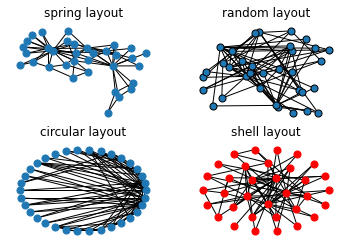

In [3]:


g = nx.Graph()
# addinga nodenamed'John'
g.add_node('John')
# addinga bunchof nodesatonce
g.add_nodes_from(['Josh', 'Jane', 'Jess', 'Jack'])
# addinganedgebetween'John' and 'Jane'
g.add_edge('John', 'Jane')
# addinga bunchof edgesatonce
g.add_edges_from([('Jess', 'Josh'), ('John', 'Jack'), ('Jack', 'Jane')])
# addingmoreedges
# undefinednodeswillbe createdautomatically
g.add_edges_from([('Jess', 'Jill'), ('Jill', 'Jeff'), ('Jeff', 'Jane')])
# removingthe edgebetween'John' and 'Jane'
g.remove_edge('John', 'Jane')
# removingthe node'John'
# alledgesconnectedto thatnodewillbe removedtoo
g.remove_node('John')

g.edges()

g = nx.karate_club_graph()
plt.subplot(2, 2, 1)
nx.draw(g,node_size=50)
plt.title("spring layout")
plt.subplot(2, 2, 2)
nx.draw_random(g,node_size=50)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000")
plt.title("random layout")
plt.subplot(2, 2, 3)
nx.draw_circular(g,node_size=50)
plt.title("circular layout")
plt.subplot(2, 2, 4)
shells = [[0, 1, 2, 32, 33],[3, 5, 6, 7, 8, 13, 23, 27, 29, 30, 31],[4, 9, 10, 11, 12, 14, 15, 16, 17, 18,19, 20, 21, 22, 24, 25, 26, 28]]
nx.draw_shell(g, nlist= shells,node_size=50,linewidths=1,edge_color='black',node_color='r',
node_shape='o')
plt.title("shell layout")
plt.show()

# A = nx.adjacency_matrix(g)
# A_dense = A.todense()
# f = np.asarray(A_dense)

# f[0][1] = 18
# D = nx.convert_matrix.from_numpy_matrix(f)